In [52]:
#!pip install tensorflow

In [3]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [23]:
# generate and prepare the dataset
def get_data():
    # generate dataset
    X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
    # split into train and test
    n_test = 500
    X_train, X_test = X[:n_test, :], X[n_test:, :]
    y_train, y_test = y[:n_test], y[n_test:]
    return X_train, y_train, X_test, y_test


In [24]:
# define and fit the model
def get_model(X_train, y_train):
    # define model
    model = Sequential()
    model.add(Dense(100, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    model.fit(X_train, y_train, epochs=300, verbose=0)
    return model

In [25]:
# generate data
X_train, y_train, X_test, y_test = get_data()
# fit model
model = get_model(X_train, y_train)

In [26]:
# predict probabilities for test set

y_pred_proba = model.predict_proba(X_test, verbose=0)
# predict crisp classes for test set
y_pred =  model.predict_classes(X_test, verbose=0)

# reduce to 1d array
y_pred_proba = y_pred_proba[:, 0]
y_pred = y_pred[:, 0]


C:\Users\sesa603997\Anaconda3\lib\site-packages\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
C:\Users\sesa603997\Anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [27]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.848000
Precision: 0.852000
Recall: 0.845238
F1 score: 0.848606


In [50]:
# kappa
kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Cohens kappa: 0.696000
ROC AUC: 0.923787
[[211  37]
 [ 39 213]]


In [18]:
len(testy)

500

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.924


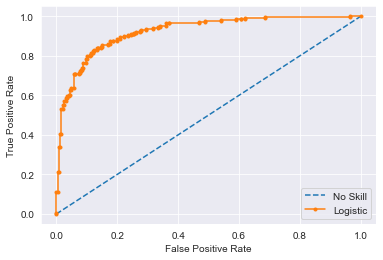

In [49]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred_proba
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()